In [1]:
import env
import utilities as utils
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from wrangle_zillow import wrangle_zillow_data
from sklearn.preprocessing import RobustScaler
from scipy import stats
from sklearn.cluster import KMeans

In [2]:
train, validate, test = wrangle_zillow_data()

In [3]:
cat_vars = ['build_quality', 'fips', 'latitude', 'longitude', 'land_use_code', 'zoning_desc', 'city_id', 'county_id', 'transaction_date', 'heat_system_desc', 'property_land_use_desc']
cont_vars = ['bathrooms', 'bedrooms', 'fractional_bathrooms', 'sqft', 'lot_size', 'rooms', 'units', 'age', 'structure_tax_value', 'tax_value', 'land_tax_value', 'tax_amount', 'error']

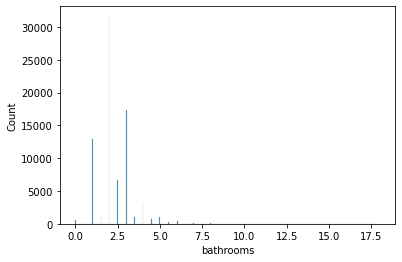

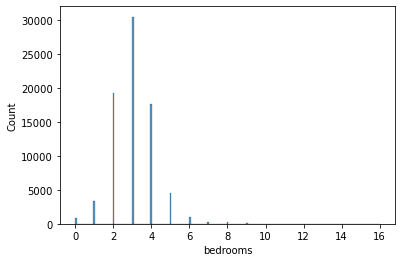

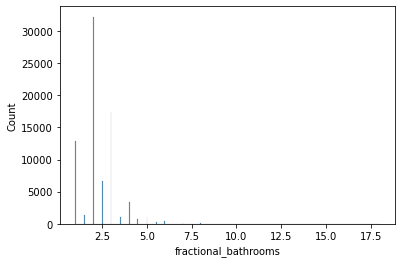

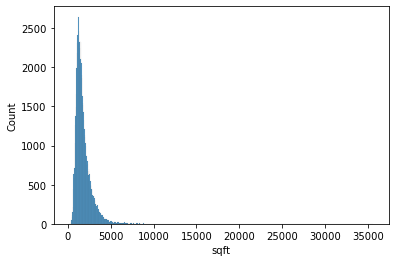

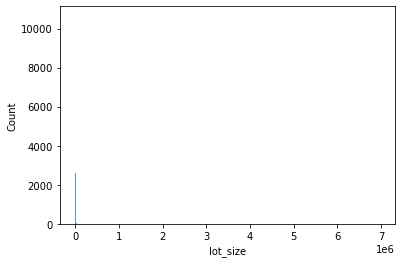

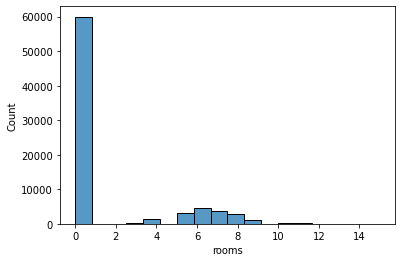

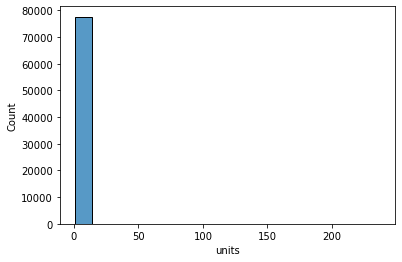

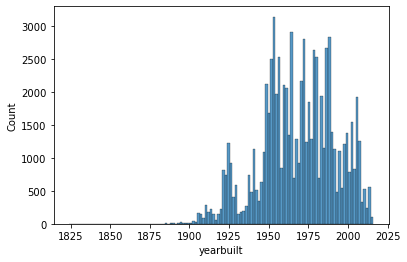

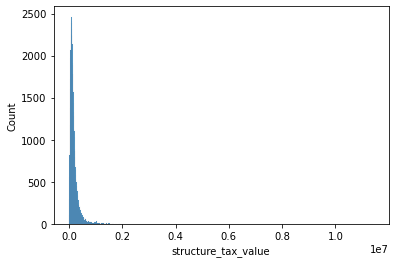

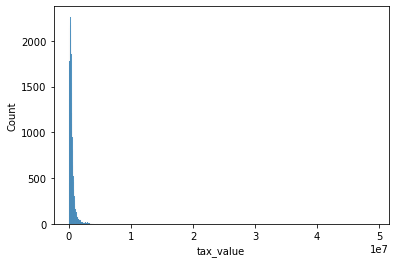

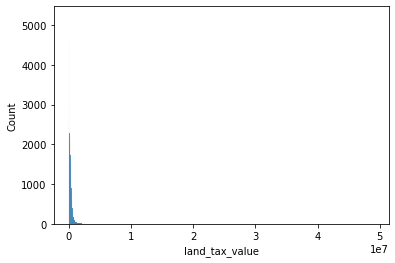

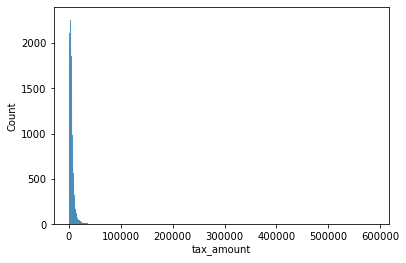

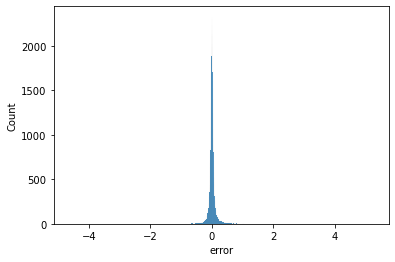

In [8]:
for var in cont_vars:
    sns.histplot(zillow_df[var])
    plt.show()

In [6]:
test.shape

(12018, 45)

In [44]:
validate.generate_outlier_bounds(train, 'error', 3)

(0.2303946228943999, -0.21584279780949994)

In [3]:
scale_vars = ['bathrooms', 'bedrooms', 'fractional_bathrooms', 'sqft', 'lot_size', 'rooms', 'units', 'age', 'structure_tax_value', 'tax_value', 'land_tax_value', 'tax_amount']
train_scaled, validate_scaled, test_scaled = utils.generate_scaled_splits(train[scale_vars],validate[scale_vars], test[scale_vars], RobustScaler())

In [4]:
train_scaled.head(5)

bathrooms  bedrooms  fractional_bathrooms      sqft  lot_size  rooms  \
0       -1.0      -0.5                  -1.0 -0.731602 -0.204857    0.0   
1       -0.5       0.0                  -0.5 -0.438312  0.877496    6.0   
2        0.0       0.0                   0.0  0.094156  0.282137    0.0   
3       -1.0       0.0                  -1.0 -0.536797  0.064112    0.0   
4        0.0       0.0                   0.0  0.257576  0.520022    0.0   

   units       age  structure_tax_value  tax_value  land_tax_value  tax_amount  
0    0.0  0.617647            -0.831112  -0.887586       -0.677382   -0.942898  
1    0.0  0.411765            -0.572834  -0.102576        0.202189   -0.123339  
2    0.0  0.411765            -0.132959  -0.330830       -0.296012   -0.323827  
3    0.0  0.470588            -0.350054   0.074343        0.322938    0.108619  
4    0.0  0.558824            -0.674422  -0.770178       -0.601415   -0.734167

In [5]:
train.head(5)

bathrooms  bedrooms  build_quality  fractional_bathrooms    sqft  \
27500        1.0       2.0            4.0                   1.0   865.0   
53289        1.5       3.0            8.0                   1.5  1136.0   
3218         2.0       3.0            6.0                   2.0  1628.0   
43164        1.0       3.0            4.0                   1.0  1045.0   
44369        2.0       3.0            6.0                   2.0  1779.0   

         fips    latitude    longitude  lot_size land_use_code  ...  \
27500  6037.0  34125646.0 -118226085.0    6256.0          0100  ...   
53289  6059.0  33737958.0 -117887890.0   11270.0           122  ...   
3218   6037.0  34202347.0 -118496273.0    8512.0          0101  ...   
43164  6037.0  33919150.0 -118022237.0    7502.0          0100  ...   
44369  6037.0  33935803.0 -118021086.0    9614.0          0100  ...   

      Cooperative  Duplex (2 Units, Any Combination)  \
27500           0                                  0   
53289           0                                  0   
3218            0                                  0   
43164           0                                  0   
44369           0                                  0   

       Manufactured, Modular, Prefabricated Homes  Mobile Home  \
27500                                           0            0   
53289                                           0            0   
3218                                            0            0   
43164                                           0            0   
44369                                           0            0   

       Planned Unit Development  Quadruplex (4 Units, Any Combination)  \
27500                         0                                      0   
53289                         0                                      0   
3218                          0                                      0   
43164                         0                                      0   
44369                         0                                      0   

       Residential General  Single Family Residential  Townhouse  \
27500                    0                          1          0   
53289                    0                          1          0   
3218                     0                          1          0   
43164                    0                          1          0   
44369                    0                          1          0   

      Triplex (3 Units, Any Combination)  
27500                                  0  
53289                                  0  
3218                                   0  
43164                                  0  
44369                                  0  

[5 rows x 46 columns]

In [7]:
train.error.describe()

count    33649.000000
mean         0.006193
std          0.060974
min         -0.209650
25%         -0.023381
50%          0.005375
75%          0.033997
max          0.223446
Name: error, dtype: float64

In [9]:
train.columns

Index([                                 'bathrooms',
                                         'bedrooms',
                                    'build_quality',
                             'fractional_bathrooms',
                                             'sqft',
                                             'fips',
                                         'latitude',
                                        'longitude',
                                         'lot_size',
                                    'land_use_code',
                                      'zoning_desc',
                                          'city_id',
                                            'units',
                              'structure_tax_value',
                                        'tax_value',
                                   'land_tax_value',
                                       'tax_amount',
                                            'error',
                                 'transaction_

In [101]:
cat_vars = ['build_quality', 'fips']
quant_vars = ['bathrooms', 'bedrooms', 'sqft', 'lot_size', 'structure_tax_value', 'tax_value', 'land_tax_value', 'tax_amount', 'age']

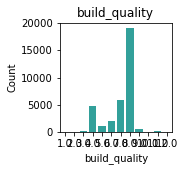

      build_quality  Count  Percent
8.0             8.0  19052    56.62
6.0             7.0   5823    17.31
4.0             4.0   4776    14.19
7.0             6.0   2087     6.20
5.0             5.0   1002     2.98
9.0             9.0    593     1.76
3.0             3.0    149     0.44
11.0           11.0    130     0.39
10.0           12.0     22     0.07
1.0             2.0      8     0.02
12.0           10.0      4     0.01
2.0             1.0      3     0.01
_________________________________________________________________


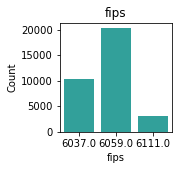

          fips  Count  Percent
6037.0  6059.0  20269    60.24
6059.0  6037.0  10314    30.65
6111.0  6111.0   3066     9.11
_________________________________________________________________


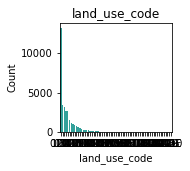

     land_use_code  Count  Percent
0100           122  13187    39.19
122           010C   3383    10.05
122             34   3113     9.25
0101          0100   2667     7.93
34            0101   2632     7.82
...            ...    ...      ...
0401          0401      1     0.00
020G          0109      1     0.00
0102          1116      1     0.00
030G          012E      1     0.00
1116          1410      1     0.00

[65 rows x 3 columns]
_________________________________________________________________


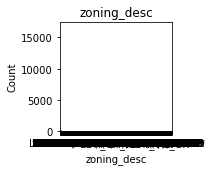

           zoning_desc  Count  Percent
LAR1              LAR1  16595    49.32
LARS             RBR4*    734     2.18
LAR3          CERS5000    675     2.01
LBR1N           LCRA06    642     1.91
LAR2              LAR2    476     1.41
...                ...    ...      ...
SGR2*       RERA15000*      1     0.00
WCMF8*           GAASP      1     0.00
SRR3YY          LBPD25      1     0.00
SOR122500*      LARAS3      1     0.00
RERA2L            LBCT      1     0.00

[1284 rows x 3 columns]
_________________________________________________________________


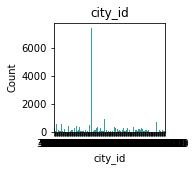

         city_id  Count  Percent
12447.0  25459.0   7362    21.88
46298.0  33612.0   1111     3.30
5534.0   32380.0    904     2.69
52650.0  12447.0    881     2.62
16764.0  38032.0    768     2.28
...          ...    ...      ...
18875.0  33312.0      2     0.01
6822.0   25621.0      1     0.00
34037.0  53162.0      1     0.00
10815.0  10815.0      1     0.00
53162.0  34037.0      1     0.00

[170 rows x 3 columns]
_________________________________________________________________


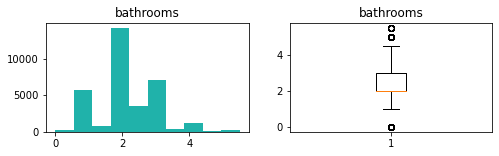

count    33649.000000
mean         2.196291
std          0.821414
min          0.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          5.500000
Name: bathrooms, dtype: float64


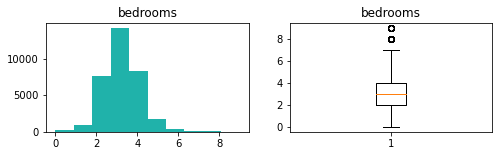

count    33649.000000
mean         3.095991
std          1.035450
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          9.000000
Name: bedrooms, dtype: float64


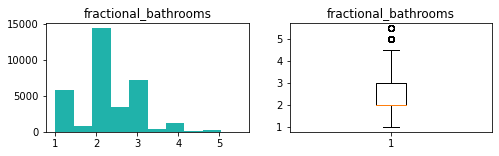

count    33649.000000
mean         2.209100
std          0.802449
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          5.500000
Name: fractional_bathrooms, dtype: float64


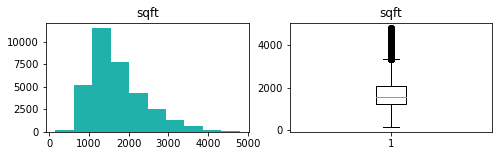

count    33649.000000
mean      1704.768463
std        695.296744
min        152.000000
25%       1208.000000
50%       1542.000000
75%       2058.000000
max       4793.000000
Name: sqft, dtype: float64


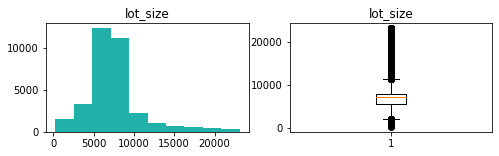

count    33649.000000
mean      7386.990282
std       3519.984121
min        236.000000
25%       5601.000000
50%       7040.000000
75%       7890.000000
max      23134.000000
Name: lot_size, dtype: float64


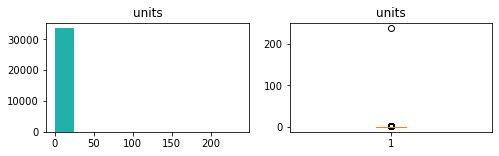

count    33649.000000
mean         1.072662
std          1.333185
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        237.000000
Name: units, dtype: float64


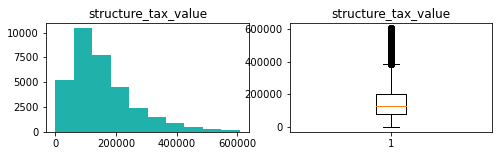

count     33649.000000
mean     155468.024310
std      105660.369843
min          44.000000
25%       79674.000000
50%      128990.000000
75%      203070.000000
max      608096.000000
Name: structure_tax_value, dtype: float64


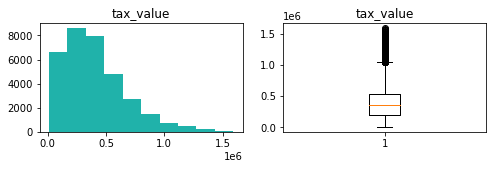

count    3.364900e+04
mean     4.022785e+05
std      2.691370e+05
min      9.242000e+03
25%      2.028420e+05
50%      3.530240e+05
75%      5.395490e+05
max      1.592248e+06
Name: tax_value, dtype: float64


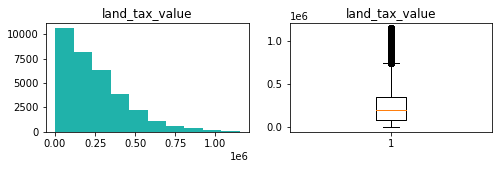

count    3.364900e+04
mean     2.469234e+05
std      2.036831e+05
min      1.627000e+03
25%      8.564000e+04
50%      2.033720e+05
75%      3.500000e+05
max      1.152511e+06
Name: land_tax_value, dtype: float64


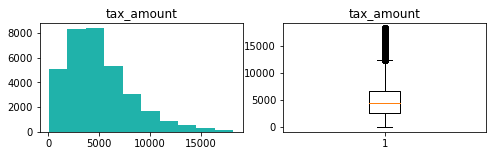

count    33649.000000
mean      4975.687311
std       3147.832687
min         49.180000
25%       2679.930000
50%       4385.900000
75%       6562.920000
max      18213.060000
Name: tax_amount, dtype: float64


In [11]:
utils.explore_univariate(train, cat_vars, quant_vars)

(array([1.1000e+01, 1.4900e+02, 4.7760e+03, 1.0020e+03, 5.8230e+03,
        2.0870e+03, 1.9052e+04, 5.9300e+02, 2.2000e+01, 1.3400e+02]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <BarContainer object of 10 artists>)

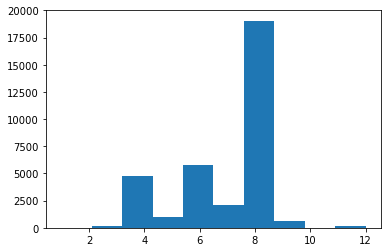

In [15]:
plt.hist(x='build_quality', data=train)

# Do properties with a build quality of 8 have a statistically different error than the population mean?

In [26]:
build_8 = train[train.build_quality == 8]

t, p = stats.ttest_1samp(build_8.error, train.error.mean())
utils.evaluate_hypothesis_ttest(p, t, .05)

------------------------------------------
t:  2.0712177911022285, p:  0.03835187861205337, a:  0.05

We reject the null hypothesis. We move forward with the alternative hypothesis:  
------------------------------------------


{'t': 2.0712177911022285,
 'p': 0.03835187861205337,
 'a': 0.05,
 'message': 'We reject the null hypothesis. We move forward with the alternative hypothesis:  ',
 'reject_null': True}

(array([20269.,     0., 10314.,     0.,     0.,     0.,     0.,     0.,
            0.,  3066.]),
 array([6037. , 6044.4, 6051.8, 6059.2, 6066.6, 6074. , 6081.4, 6088.8,
        6096.2, 6103.6, 6111. ]),
 <BarContainer object of 10 artists>)

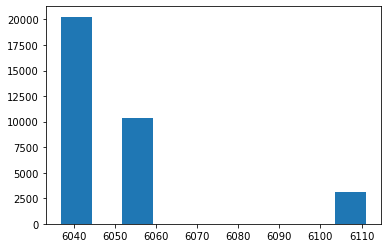

In [27]:
plt.hist(x='fips', data=train)

# Do Fips 6037 properties have a statistically different error than the population mean?

In [31]:
fips_6037 = train[train.fips == 6037]

t, p = stats.ttest_1samp(fips_6037.error, train.error.mean())
utils.evaluate_hypothesis_ttest(p, t, .05)

------------------------------------------
t:  -2.0379332635683833, p:  0.041569564199088894, a:  0.05

We reject the null hypothesis. We move forward with the alternative hypothesis:  
------------------------------------------


{'t': -2.0379332635683833,
 'p': 0.041569564199088894,
 'a': 0.05,
 'message': 'We reject the null hypothesis. We move forward with the alternative hypothesis:  ',
 'reject_null': True}

(array([  215.,  5757.,   754., 14200.,  3483.,  7164.,   429.,  1255.,
          150.,   242.]),
 array([0.  , 0.55, 1.1 , 1.65, 2.2 , 2.75, 3.3 , 3.85, 4.4 , 4.95, 5.5 ]),
 <BarContainer object of 10 artists>)

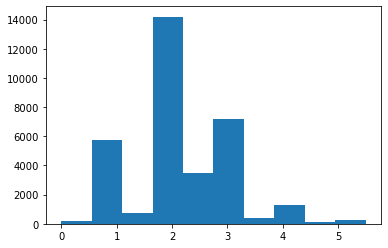

In [17]:
plt.hist(x='bathrooms', data=train)

# Do properties with 2 bathrooms have a statistically different error than the population?

In [32]:
baths_2 = train[train.bathrooms == 2]

t, p = stats.ttest_1samp(baths_2.error, train.error.mean())
utils.evaluate_hypothesis_ttest(p, t, .05)

------------------------------------------
t:  -3.0279582815887416, p:  0.002466539697289605, a:  0.05

We reject the null hypothesis. We move forward with the alternative hypothesis:  
------------------------------------------


{'t': -3.0279582815887416,
 'p': 0.002466539697289605,
 'a': 0.05,
 'message': 'We reject the null hypothesis. We move forward with the alternative hypothesis:  ',
 'reject_null': True}

(array([  265.,   989.,  7669., 14157.,  8280.,  1763.,   364.,    57.,
           84.,    21.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

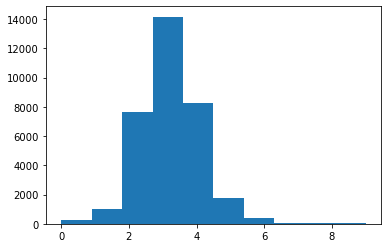

In [18]:
plt.hist(x='bedrooms', data=train)

# Do properties with 3 bedrooms have a statistically different error than the population?

In [33]:
beds_3 = train[train.bedrooms == 3]

t, p = stats.ttest_1samp(beds_3.error, train.error.mean())
utils.evaluate_hypothesis_ttest(p, t, .05)

------------------------------------------
t:  -0.6872046338010391, p:  0.49196504252577966, a:  0.05

We fail to reject the null hypothesis:  
------------------------------------------


{'t': -0.6872046338010391,
 'p': 0.49196504252577966,
 'a': 0.05,
 'message': 'We fail to reject the null hypothesis:  ',
 'reject_null': False}

(array([  218.,  5162., 11485.,  7765.,  4313.,  2486.,  1261.,   622.,
          249.,    88.]),
 array([ 152. ,  616.1, 1080.2, 1544.3, 2008.4, 2472.5, 2936.6, 3400.7,
        3864.8, 4328.9, 4793. ]),
 <BarContainer object of 10 artists>)

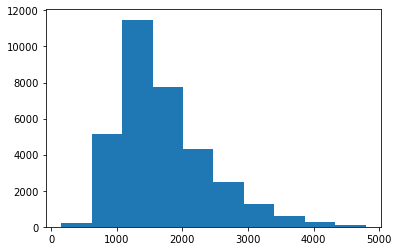

In [19]:
plt.hist(x='sqft', data=train)

# Is there a correlation between erorr and sqft, lot size, or the different tax values and amount?

In [35]:
corr, p = stats.pearsonr(train.sqft, train.error)
utils.evaluate_hypothesis_pcorrelation(corr, p, .05)

------------------------------------------
corr:  0.05792746283135167, p:  2.0581032531599545e-26, a:  0.05

We reject the null hypothesis. We move forward with the alternative hypothesis:  
Correlation direction:  positive
------------------------------------------


{'corr': 0.05792746283135167,
 'p': 2.0581032531599545e-26,
 'a': 0.05,
 'reject_null': True,
 'message': 'We reject the null hypothesis. We move forward with the alternative hypothesis:  ',
 'correlation': 'positive'}

In [36]:
corr, p = stats.pearsonr(train.lot_size, train.error)
utils.evaluate_hypothesis_pcorrelation(corr, p, .05)

------------------------------------------
corr:  0.006456224570867102, p:  0.2363036391843059, a:  0.05

We fail to reject the null hypothesis:  
Correlation direction:  positive
------------------------------------------


{'corr': 0.006456224570867102,
 'p': 0.2363036391843059,
 'a': 0.05,
 'reject_null': False,
 'message': 'We fail to reject the null hypothesis:  ',
 'correlation': 'positive'}

In [37]:
corr, p = stats.pearsonr(train.tax_amount, train.error)
utils.evaluate_hypothesis_pcorrelation(corr, p, .05)

------------------------------------------
corr:  0.0038544941240846306, p:  0.479546715324026, a:  0.05

We fail to reject the null hypothesis:  
Correlation direction:  positive
------------------------------------------


{'corr': 0.0038544941240846306,
 'p': 0.479546715324026,
 'a': 0.05,
 'reject_null': False,
 'message': 'We fail to reject the null hypothesis:  ',
 'correlation': 'positive'}

In [38]:
corr, p = stats.pearsonr(train.tax_value, train.error)
utils.evaluate_hypothesis_pcorrelation(corr, p, .05)

------------------------------------------
corr:  0.006320660944173304, p:  0.24628938821296117, a:  0.05

We fail to reject the null hypothesis:  
Correlation direction:  positive
------------------------------------------


{'corr': 0.006320660944173304,
 'p': 0.24628938821296117,
 'a': 0.05,
 'reject_null': False,
 'message': 'We fail to reject the null hypothesis:  ',
 'correlation': 'positive'}

In [39]:
corr, p = stats.pearsonr(train.structure_tax_value, train.error)
utils.evaluate_hypothesis_pcorrelation(corr, p, .05)

------------------------------------------
corr:  0.01712302113986951, p:  0.0016831282737206179, a:  0.05

We reject the null hypothesis. We move forward with the alternative hypothesis:  
Correlation direction:  positive
------------------------------------------


{'corr': 0.01712302113986951,
 'p': 0.0016831282737206179,
 'a': 0.05,
 'reject_null': True,
 'message': 'We reject the null hypothesis. We move forward with the alternative hypothesis:  ',
 'correlation': 'positive'}

In [40]:
corr, p = stats.pearsonr(train.land_tax_value, train.error)
utils.evaluate_hypothesis_pcorrelation(corr, p, .05)

------------------------------------------
corr:  -0.000597388868461326, p:  0.9127433101790401, a:  0.05

We fail to reject the null hypothesis:  
Correlation direction:  negative
------------------------------------------


{'corr': -0.000597388868461326,
 'p': 0.9127433101790401,
 'a': 0.05,
 'reject_null': False,
 'message': 'We fail to reject the null hypothesis:  ',
 'correlation': 'negative'}

In [41]:
corr, p = stats.pearsonr(train.age, train.error)
utils.evaluate_hypothesis_pcorrelation(corr, p, .05)

------------------------------------------
corr:  -0.025529678793929346, p:  2.817866028377101e-06, a:  0.05

We reject the null hypothesis. We move forward with the alternative hypothesis:  
Correlation direction:  negative
------------------------------------------


{'corr': -0.025529678793929346,
 'p': 2.817866028377101e-06,
 'a': 0.05,
 'reject_null': True,
 'message': 'We reject the null hypothesis. We move forward with the alternative hypothesis:  ',
 'correlation': 'negative'}

build_quality vs error
-------------------------------


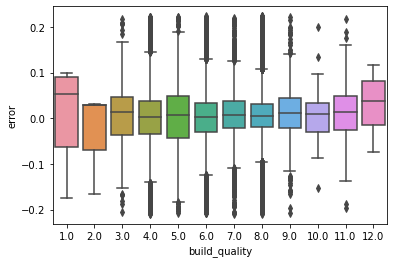

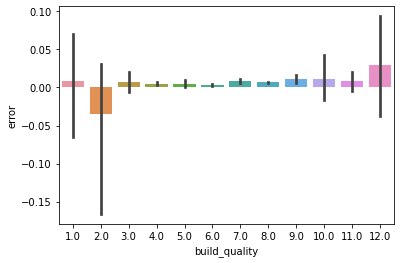

-------------------------------
Mean error by build_quality:  
build_quality
1.0     0.008181
2.0    -0.035402
3.0     0.006844
4.0     0.004719
5.0     0.004912
6.0     0.003471
7.0     0.008526
8.0     0.007022
9.0     0.011330
10.0    0.011780
11.0    0.008204
12.0    0.029777
Name: error, dtype: float64

fips vs error
-------------------------------


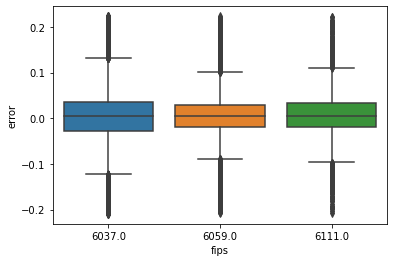

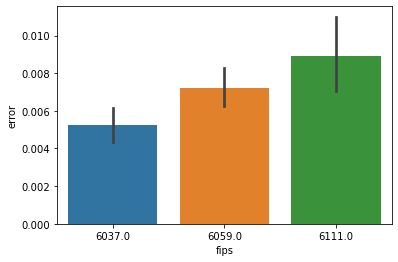

-------------------------------
Mean error by fips:  
fips
6037.0    0.005257
6059.0    0.007231
6111.0    0.008892
Name: error, dtype: float64



In [21]:
utils.explore_bivariate_categorical('error', cat_vars, train)

bathrooms vs error
-------------------------------


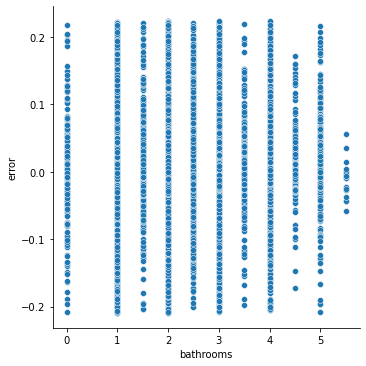

-------------------------------
Correlation between bathrooms and error:  0.05060220776583965
P value:  1.5735628391798615e-20

bedrooms vs error
-------------------------------


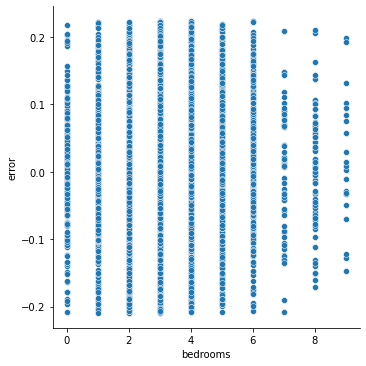

-------------------------------
Correlation between bedrooms and error:  0.034702372704012927
P value:  1.922997327830127e-10

sqft vs error
-------------------------------


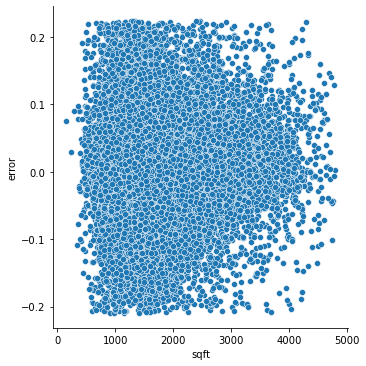

-------------------------------
Correlation between sqft and error:  0.05792746283135167
P value:  2.0581032531599545e-26

lot_size vs error
-------------------------------


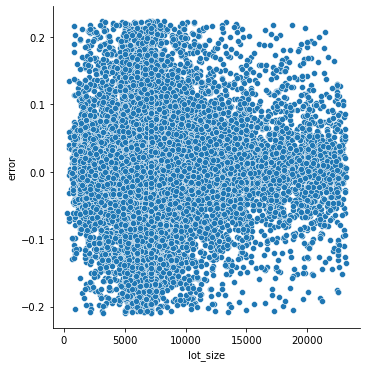

-------------------------------
Correlation between lot_size and error:  0.006456224570867102
P value:  0.2363036391843059

structure_tax_value vs error
-------------------------------


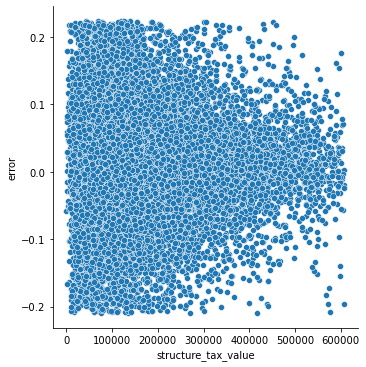

-------------------------------
Correlation between structure_tax_value and error:  0.01712302113986951
P value:  0.0016831282737206179

tax_value vs error
-------------------------------


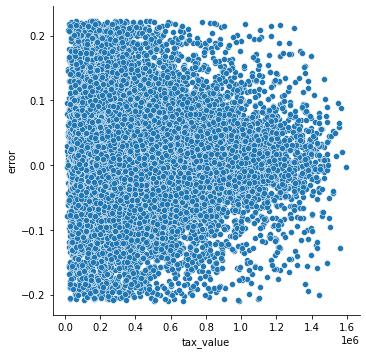

-------------------------------
Correlation between tax_value and error:  0.006320660944173304
P value:  0.24628938821296117

land_tax_value vs error
-------------------------------


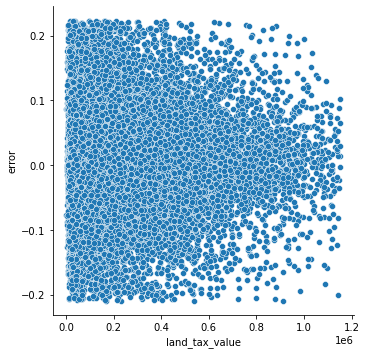

-------------------------------
Correlation between land_tax_value and error:  -0.000597388868461326
P value:  0.9127433101790401

tax_amount vs error
-------------------------------


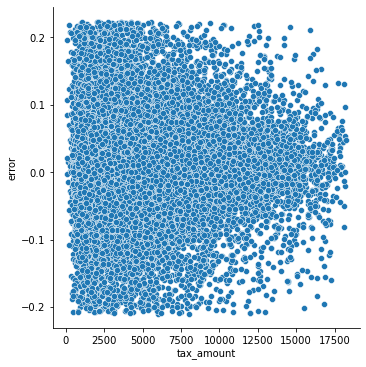

-------------------------------
Correlation between tax_amount and error:  0.0038544941240846306
P value:  0.479546715324026

age vs error
-------------------------------


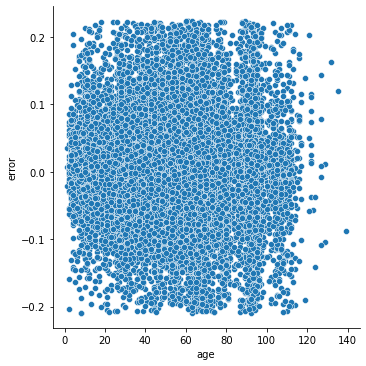

-------------------------------
Correlation between age and error:  -0.025529678793929346
P value:  2.817866028377101e-06



In [125]:
utils.explore_bivariate_continuous('error', quant_vars, train)

bathrooms vs error
-------------------------------


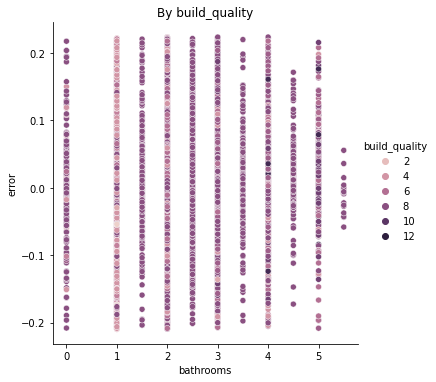

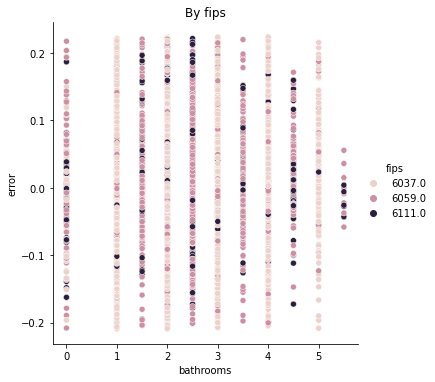


bedrooms vs error
-------------------------------


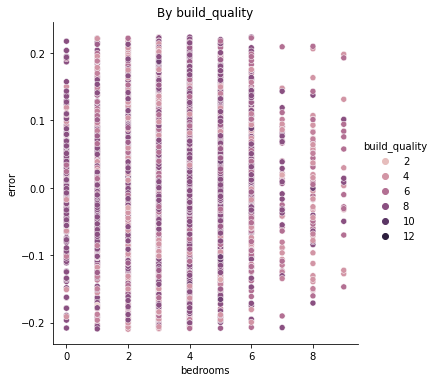

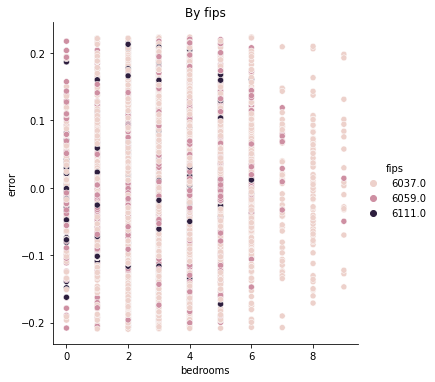


sqft vs error
-------------------------------


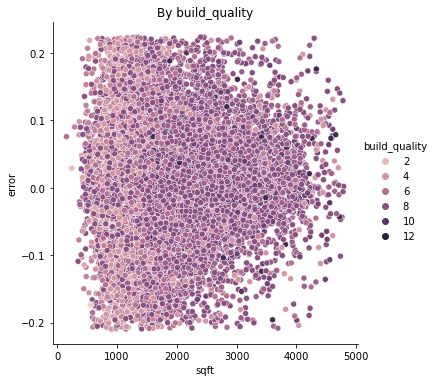

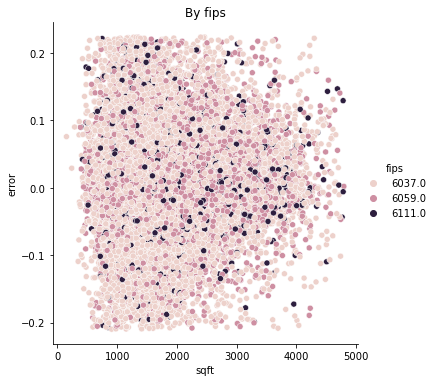


lot_size vs error
-------------------------------


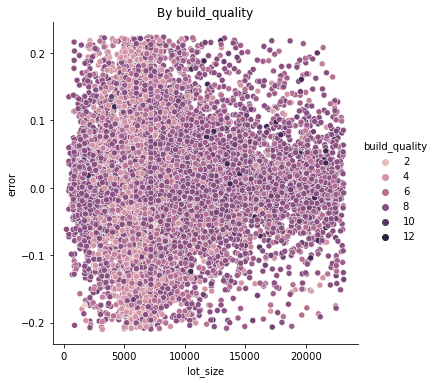

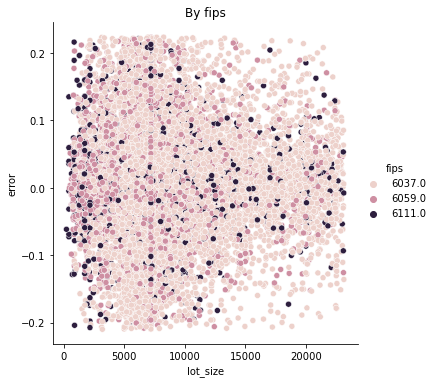


structure_tax_value vs error
-------------------------------


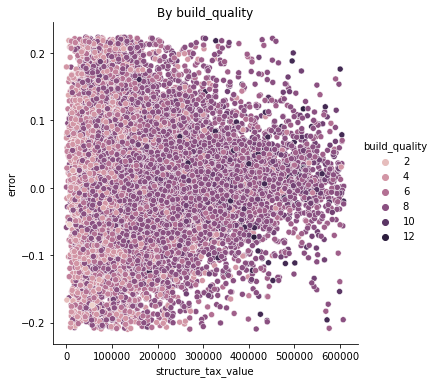

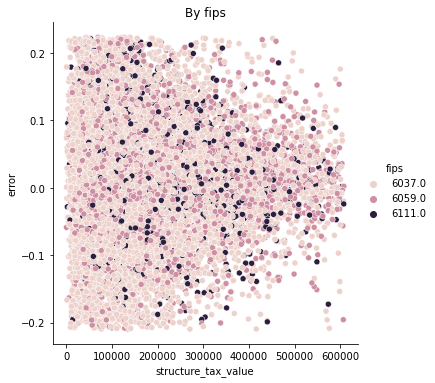


tax_value vs error
-------------------------------


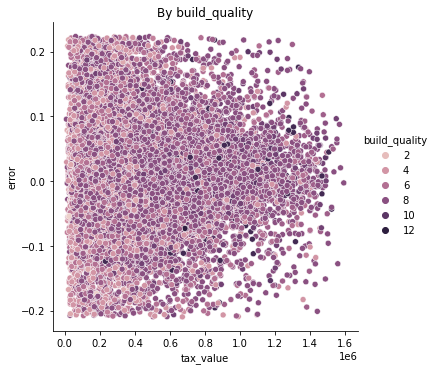

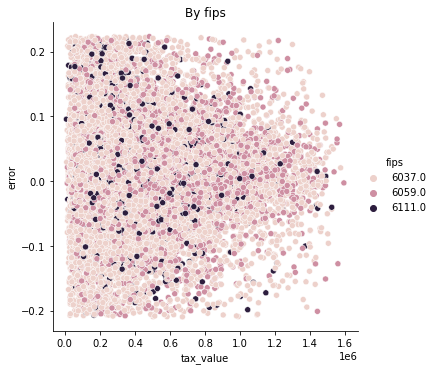


land_tax_value vs error
-------------------------------


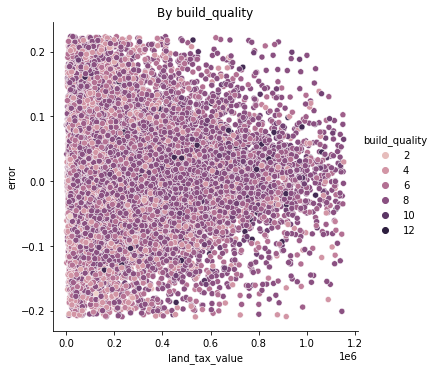

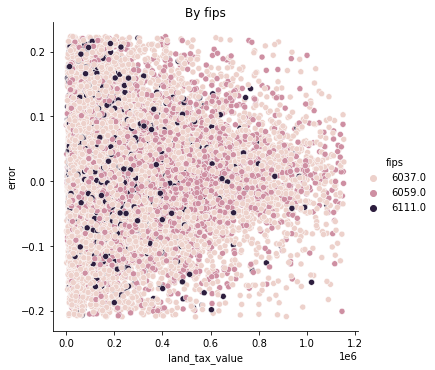


tax_amount vs error
-------------------------------


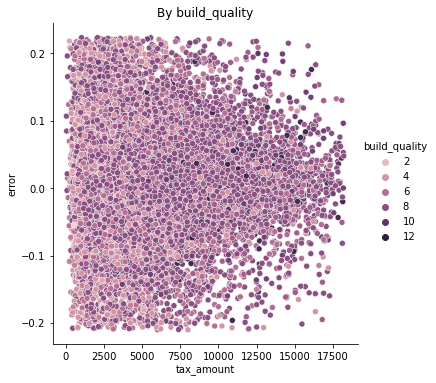

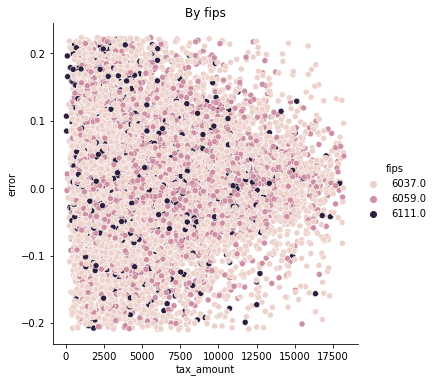

In [23]:
utils.explore_multivariate_(quant_vars, cat_vars, 'error', train)

In [72]:
sns.scatterplot(x='bathrooms', y='sqft', hue='error', data=fips_6037.sample(250, random_state=1414))

NameError: name 'fips_6037' is not defined

<AxesSubplot:xlabel='sqft', ylabel='structure_tax_value'>

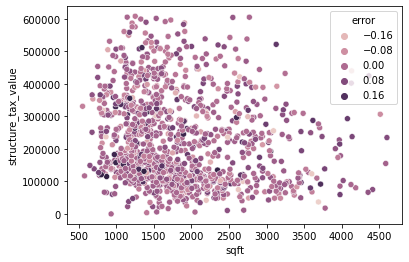

In [88]:
sns.scatterplot(x='sqft', y=train.groupby('sqft').structure_tax_value.mean(), hue='error', data=train)

<AxesSubplot:xlabel='fips', ylabel='sqft'>

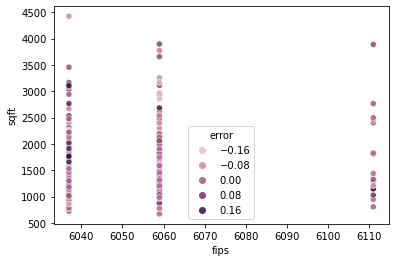

In [93]:
sns.scatterplot(x='fips', y='sqft', hue='error', data=train.sample(250, random_state=1414))

<AxesSubplot:xlabel='age', ylabel='sqft'>

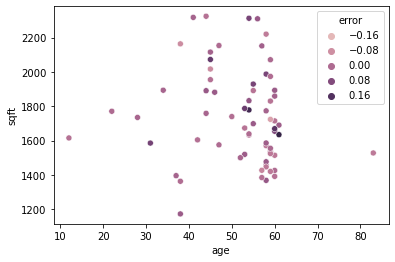

In [89]:
sns.scatterplot(x='age', y=train.groupby('age').sqft.mean(), hue='error', data=train)

<AxesSubplot:xlabel='age', ylabel='structure_tax_value'>

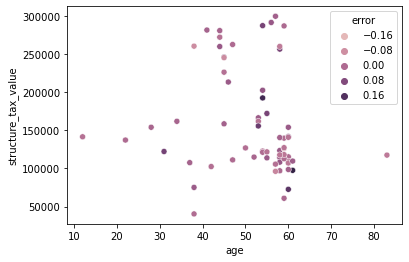

In [145]:
sns.scatterplot(x='age', y=train.groupby('age').structure_tax_value.mean(), hue='error', data=train)

In [111]:
train, validate, test = wrangle_zillow_data()

In [123]:
cat_vars = ['fips']
quant_vars = ['build_quality', 'fractional_bathrooms', 'bedrooms', 'sqft', 'lot_size', 'structure_tax_value', 'tax_value', 'land_tax_value', 'tax_amount', 'age', 'latitude', 'longitude']

In [124]:
train_scaled, validate_scaled, test_scaled = utils.generate_scaled_splits(train[quant_vars], validate[quant_vars],test[quant_vars])

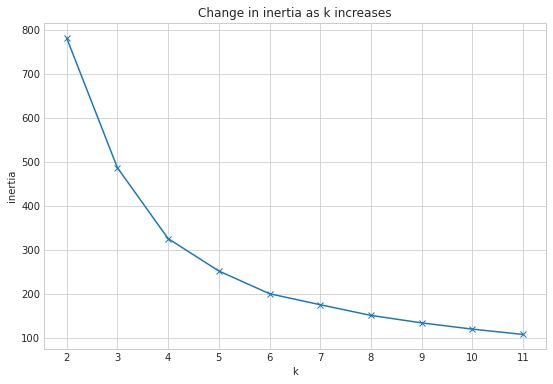

In [114]:
X_1 = train_scaled[['sqft', 'fractional_bathrooms']]

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_1).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [115]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_1)

train['size_cluster'] = kmeans.predict(X_1)
train.size_cluster = "cluster_" + train.size_cluster.astype(str)

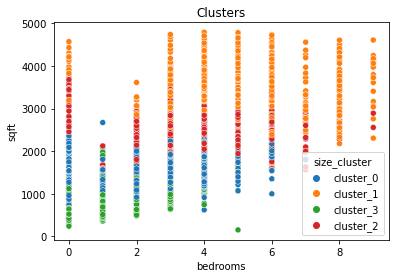

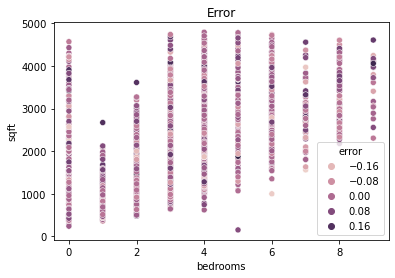

In [116]:
sns.scatterplot(x='bedrooms', y='sqft', hue='size_cluster', data=train)
plt.title("Clusters")
plt.show()
sns.scatterplot(x='bedrooms', y='sqft', hue='error', data=train)
plt.title("Error")
plt.show()

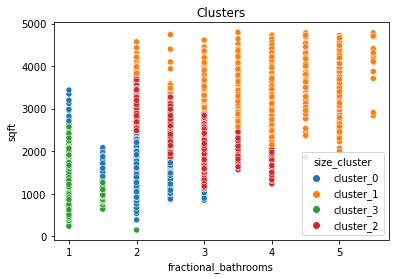

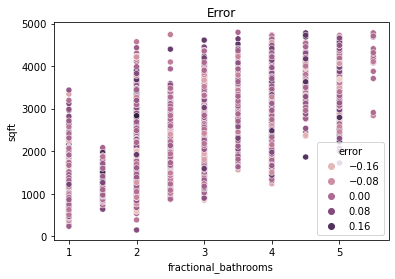

In [117]:
sns.scatterplot(x='fractional_bathrooms', y='sqft', hue='size_cluster', data=train)
plt.title("Clusters")
plt.show()
sns.scatterplot(x='fractional_bathrooms', y='sqft', hue='error', data=train)
plt.title("Error")
plt.show()

In [118]:
train.size_cluster = train.size_cluster.str.replace("cluster_3", "Apartments/Condos")
train.size_cluster = train.size_cluster.str.replace("cluster_0", "Small homes")
train.size_cluster = train.size_cluster.str.replace("cluster_1", "Large homes")
train.size_cluster = train.size_cluster.str.replace("cluster_2", "Medium homes")

In [119]:
train.sample(14)

bathrooms  bedrooms  build_quality  fractional_bathrooms    sqft  \
25317        3.0       3.0            8.0                   3.0  1890.0   
5114         3.0       3.0            8.0                   3.0  1604.0   
64607        2.0       4.0            8.0                   2.0  1916.0   
73843        2.0       3.0            8.0                   2.0  1814.0   
71589        2.0       4.0            8.0                   2.0  1647.0   
40210        2.0       3.0            4.0                   2.0  1321.0   
35797        1.0       2.0            4.0                   1.0  1081.0   
68164        2.0       2.0            8.0                   2.0  1425.0   
66623        1.5       3.0            8.0                   1.5  1132.0   
1820         2.0       4.0            8.0                   2.0  1549.0   
12881        2.0       2.0            6.0                   2.0   978.0   
52857        2.0       3.0            8.0                   2.0  1214.0   
66452        1.0       2.0            8.0                   1.0   834.0   
4634         2.0       3.0            6.0                   2.0  1908.0   

         fips    latitude    longitude  lot_size land_use_code  ...  \
25317  6037.0  34068300.0 -118134000.0    7205.0          010C  ...   
5114   6037.0  34150100.0 -118427000.0    6008.0          010C  ...   
64607  6059.0  33637462.0 -117648024.0    5959.0           122  ...   
73843  6111.0  34212153.0 -119181754.0    7053.0          1110  ...   
71589  6111.0  34398160.0 -118917977.0    9654.0          1111  ...   
40210  6037.0  33827124.0 -118304376.0    7200.0          0100  ...   
35797  6037.0  33995340.0 -118074193.0    8050.0          0100  ...   
68164  6059.0  33598365.0 -117862658.0    7205.0            34  ...   
66623  6059.0  33715934.0 -118011441.0    7205.0            34  ...   
1820   6037.0  34182026.0 -118549489.0    6930.0          0100  ...   
12881  6037.0  34576096.0 -118071445.0    4618.0          0100  ...   
52857  6059.0  33764684.0 -117982656.0    6558.0           122  ...   
66452  6059.0  33496027.0 -117669551.0    7205.0            34  ...   
4634   6037.0  34188146.0 -118425642.0    7290.0          0100  ...   

      Duplex (2 Units, Any Combination)  \
25317                                 0   
5114                                  0   
64607                                 0   
73843                                 0   
71589                                 0   
40210                                 0   
35797                                 0   
68164                                 0   
66623                                 0   
1820                                  0   
12881                                 0   
52857                                 0   
66452                                 0   
4634                                  0   

       Manufactured, Modular, Prefabricated Homes  Mobile Home  \
25317                                           0            0   
5114                                            0            0   
64607                                           0            0   
73843                                           0            0   
71589                                           0            0   
40210                                           0            0   
35797                                           0            0   
68164                                           0            0   
66623                                           0            0   
1820                                            0            0   
12881                                           0            0   
52857                                           0            0   
66452                                           0            0   
4634                                            0            0   

       Planned Unit Development  Quadruplex (4 Units, Any Combination)  \
25317                         0                                      0   
5114                          

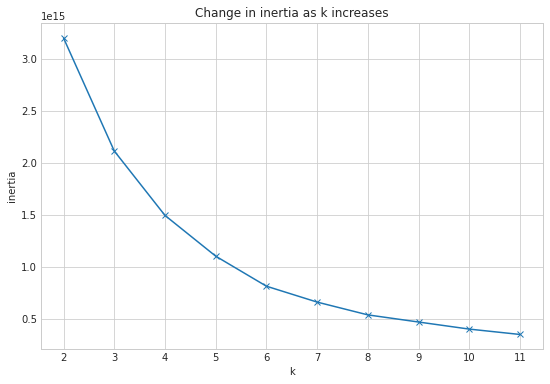

In [120]:
X_2 = train[['latitude', 'longitude', 'fips']]

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_2).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

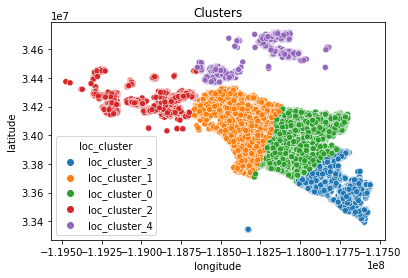

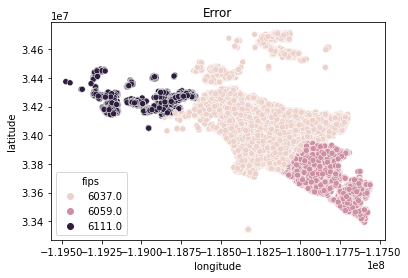

In [121]:
kmeans_location = KMeans(n_clusters=5)
kmeans_location.fit(X_2)

train['loc_cluster'] = kmeans_location.predict(X_2)
train.loc_cluster = "loc_cluster_" + train.loc_cluster.astype(str)

sns.scatterplot(x='longitude', y='latitude', hue='loc_cluster', data=train)
plt.title("Clusters")
plt.show()
sns.scatterplot(x='longitude', y='latitude', hue='fips', data=train)
plt.title("Error")
plt.show()

In [122]:
train.loc_cluster = train.loc_cluster.str.replace("loc_cluster_0", "West LA County")
train.loc_cluster = train.loc_cluster.str.replace("loc_cluster_1", "Orange County")
train.loc_cluster = train.loc_cluster.str.replace("loc_cluster_2", "East LA County")
train.loc_cluster = train.loc_cluster.str.replace("loc_cluster_3", "Ventura County")
train.loc_cluster = train.loc_cluster.str.replace("loc_cluster_4", "North LA County")
train.sample(14)

bathrooms  bedrooms  build_quality  fractional_bathrooms    sqft  \
61552        2.0       3.0            8.0                   2.0  2072.0   
7278         2.0       3.0            4.0                   2.0   928.0   
56488        3.0       5.0            8.0                   3.0  3050.0   
13546        2.0       3.0            6.0                   2.0  1770.0   
64341        2.5       3.0            8.0                   2.5  1954.0   
5005         2.0       3.0            6.0                   2.0  1477.0   
14583        1.0       3.0            4.0                   1.0  1367.0   
30168        2.0       2.0            4.0                   2.0  1536.0   
63399        2.5       3.0            8.0                   2.5  2567.0   
32138        2.0       2.0            6.0                   2.0  1288.0   
73972        2.0       3.0            8.0                   2.0  1120.0   
72349        2.5       3.0            8.0                   2.5  1212.0   
58926        3.0       3.0            8.0                   3.0  2851.0   
71098        1.5       2.0            8.0                   1.5   959.0   

         fips    latitude    longitude  lot_size land_use_code  ...  \
61552  6059.0  33611666.0 -117683777.0    7590.0           122  ...   
7278   6037.0  34257635.0 -118298530.0    4354.0          0100  ...   
56488  6059.0  33889492.0 -117944466.0   17226.0           122  ...   
13546  6037.0  34543527.0 -118069674.0   10828.0          0100  ...   
64341  6059.0  33611745.0 -117619086.0    4250.0           122  ...   
5005   6037.0  34163687.0 -118394583.0    8100.0          0101  ...   
14583  6037.0  34682366.0 -118143186.0    5980.0          0100  ...   
30168  6037.0  34130594.0 -118233420.0    6497.0          0100  ...   
63399  6059.0  33472235.0 -117600470.0    4071.0             1  ...   
32138  6037.0  34172810.0 -118101552.0    6897.0          0100  ...   
73972  6111.0  34183332.0 -119184623.0    7204.0          1111  ...   
72349  6111.0  34349233.0 -119081267.0    3110.0          1111  ...   
58926  6059.0  33792454.0 -117779488.0   18000.0           122  ...   
71098  6059.0  33809600.0 -117943000.0    7205.0            34  ...   

      Manufactured, Modular, Prefabricated Homes  Mobile Home  \
61552                                          0            0   
7278                                           0            0   
56488                                          0            0   
13546                                          0            0   
64341                                          0            0   
5005                                           0            0   
14583                                          0            0   
30168                                          0            0   
63399                                          0            0   
32138                                          0            0   
73972                                          0            0   
72349                                          0            0   
58926                                          0            0   
71098                                          0            0   

       Planned Unit Development  Quadruplex (4 Units, Any Combination)  \
61552                         0                                      0   
7278                          0                                      0   
56488                         0                                      0   
13546                         0                                      0   
64341                         0                                      0   
5005                          0                                      0   
14583                         0                                      0   
30168                         0                                      0   
63399                         0                                      0   
32138                         0                                      0   
73972                    

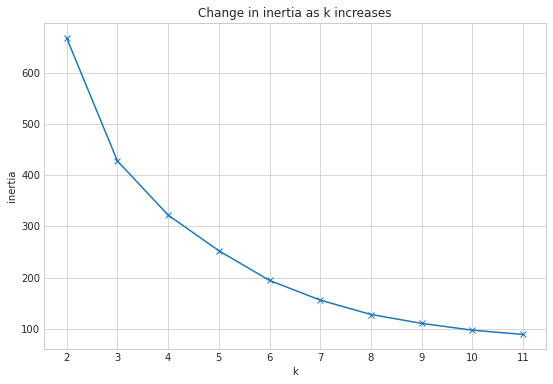

In [138]:
X_3 = train_scaled[['age', 'build_quality']]

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_3).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

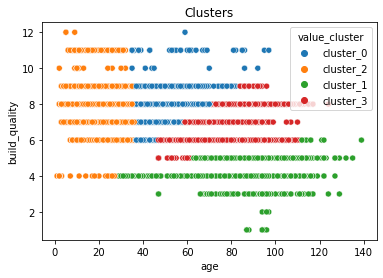

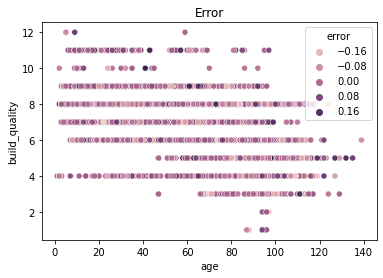

In [146]:
kmeans_value = KMeans(n_clusters=4)
kmeans_value.fit(X_3)

train['value_cluster'] = kmeans_value.predict(X_3)
train.value_cluster = "cluster_" + train.value_cluster.astype(str)

sns.scatterplot(x='age', y='build_quality', hue='value_cluster', data=train)
plt.title("Clusters")
plt.show()
sns.scatterplot(x='age', y='build_quality', hue='error', data=train)
plt.title("Error")
plt.show()

In [147]:
train.value_cluster = train.value_cluster.str.replace("cluster_0", "Mid-age properties")
train.value_cluster = train.value_cluster.str.replace("cluster_1", "Older, high quality properties")
train.value_cluster = train.value_cluster.str.replace("cluster_2", "Newer properties")
train.value_cluster = train.value_cluster.str.replace("cluster_3", "Older, low quality properties")
train.sample(14)

bathrooms  bedrooms  build_quality  fractional_bathrooms    sqft  \
75417        2.0       4.0            8.0                   2.0  2152.0   
63159        2.0       2.0            8.0                   2.0  1024.0   
48492        3.0       3.0            8.0                   3.0  1369.0   
35546        2.0       2.0            6.0                   2.0  1427.0   
7337         3.0       5.0            7.0                   3.0  2929.0   
61230        2.5       3.0            8.0                   2.5  2516.0   
34229        2.0       3.0            5.0                   2.0  1336.0   
11491        3.0       4.0            8.0                   3.0  2813.0   
3529         1.0       2.0            4.0                   1.0   867.0   
47963        4.0       4.0            8.0                   4.0  2734.0   
48209        3.0       4.0            4.0                   3.0  2440.0   
72245        2.0       4.0            8.0                   2.0  1307.0   
66948        2.5       2.0            8.0                   2.5  1012.0   
15062        2.0       3.0            8.0                   2.0  1926.0   

         fips    latitude    longitude  lot_size land_use_code  ...  \
75417  6111.0  34233034.0 -118860245.0    8891.0          1111  ...   
63159  6059.0  33411876.0 -117591106.0    2576.0           122  ...   
48492  6037.0  34099830.0 -118029892.0   14552.0          010C  ...   
35546  6037.0  34018507.0 -118123614.0    8438.0          0100  ...   
7337   6037.0  34253758.0 -118319024.0   15371.0          0100  ...   
61230  6059.0  33659588.0 -117690897.0    9100.0           122  ...   
34229  6037.0  33900854.0 -118220869.0    3758.0          0200  ...   
11491  6037.0  34442618.0 -118379333.0   11338.0          0100  ...   
3529   6037.0  34178727.0 -118442419.0    6649.0          0100  ...   
47963  6037.0  34156575.0 -118001644.0    6949.0          0100  ...   
48209  6037.0  34079835.0 -118003371.0   19997.0          0200  ...   
72245  6111.0  34294114.0 -119155219.0    7420.0          1111  ...   
66948  6059.0  33738761.0 -117790711.0    7205.0            34  ...   
15062  6037.0  34678627.0 -118086433.0    6219.0          0700  ...   

      Mobile Home  Planned Unit Development  \
75417           0                         0   
63159           0                         0   
48492           0                         0   
35546           0                         0   
7337            0                         0   
61230           0                         0   
34229           0                         0   
11491           0                         0   
3529            0                         0   
47963           0                         0   
48209           0                         0   
72245           0                         0   
66948           0                         0   
15062           1                         0   

       Quadruplex (4 Units, Any Combination)  Residential General  \
75417                                      0                    0   
63159                                      0                    0   
48492                                      0                    0   
35546                                      0                    0   
7337                                       0                    0   
61230                                      0                    0   
34229                                      0                    0   
11491                                      0                    0   
3529                                       0                    0   
47963                                      0                    0   
48209                                      0                    0   
72245                                      0                    0   
66948                                      0                    0   
15062                                      0                    0   

       Single Family Residential  Townhouse  \
75417                     